In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density'

In [3]:
url_pop_html = requests.get(url)

In [4]:
url_pop_bs = bs(url_pop_html.text)

In [5]:
tables = url_pop_bs.find_all('table',class_='wikitable')

In [6]:
pop_table = tables[0]

In [7]:
fields = [th.text.strip() for th in pop_table.find_all('tr')[0].find_all('th')]

In [8]:
fields

['Rank',
 'Country (or dependent territory)',
 'Area',
 'Population',
 'Density',
 'Date',
 'Population source']

In [9]:
trs = pop_table.find_all('tr')[2:-2]

In [10]:
rows = []

In [11]:
for tr in trs:
    tds = tr.find_all('td')
    if not tds:
        continue
    data = [td.text.strip() for td in tds]
    del data[2]
    del data[4]
    rows.append({key:value for key,value in zip(fields,data)})

In [12]:
pop_df = pd.DataFrame(rows)

In [13]:
pop_df['Country (or dependent territory)'] = pop_df['Country (or dependent territory)'].apply(lambda x: x.split(' (', 1)[0].split('[',1)[0])

In [14]:
pop_df

,Rank,Country (or dependent territory),Area,Population,Density,Date,Population source
0,–,Macau,45,"696,100","54,799","September 30, 2019",Official quarterly estimate
1,1,Monaco,0.78,"38,300","49,107","December 31, 2018",Official estimate
2,2,Singapore,279,"5,703,600","20,446","July 1, 2019",Official estimate
3,–,Hong Kong,427,"7,500,700","17,565","December 31, 2019",Official estimate
4,–,Gibraltar,2.6,"33,701","12,836","July 1, 2019",UN projection
...,...,...,...,...,...,...,...
248,194,Mongolia,"603,902","3,238,479",5.4,"December 31, 2018",Official estimate
249,–,Pitcairn Islands,18,56,3.1,"September 20, 2016",2013 census result
250,–,Falkland Islands,"4,700","2,563",0.54,"April 15, 2012",2012 census result
251,–,Svalbard and Jan Mayen,"23,706","2,655",0.10,"September 1, 2012",Official estimate


In [15]:
eq_table = pd.read_csv('../Data/04_deadly_eq_mag_cleaned.csv', index_col=False)

In [16]:
eq_table['country'] = eq_table['present-day country and link to wikipedia article'].apply(lambda x: x.split(' (', 1)[0])

In [17]:
eq_table.at[1033, 'country'] = 'Venezuela'

In [18]:
eq_table['country_join'] = eq_table['country'].str.lower()

In [19]:
pop_df['country_join'] = pop_df['Country (or dependent territory)'].str.lower()

In [20]:
eq_table_pop = eq_table.merge(pop_df, on=['country_join'] )

In [21]:
eq_table_pop

,origin (utc),present-day country and link to wikipedia article,lat,long,depth (km),magnitude,secondary effects,pde shaking deaths,pde total deaths,utsu total deaths,...,original_magnitude_scale,country,country_join,Rank,Country (or dependent territory),Area,Population,Density,Date,Population source
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,...,MJMA,Japan,japan,24,Japan,"145,937","126,010,000",863,"February 1, 2020",Monthly official estimate
1,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,...,Mw,Japan,japan,24,Japan,"145,937","126,010,000",863,"February 1, 2020",Monthly official estimate
2,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1.0,...,Ms,Japan,japan,24,Japan,"145,937","126,010,000",863,"February 1, 2020",Monthly official estimate
3,1905-06-02 05:39,Japan,34.100,132.500,55,7.0 mb,NaN,NaN,NaN,11.0,...,mb,Japan,japan,24,Japan,"145,937","126,010,000",863,"February 1, 2020",Monthly official estimate
4,1909-08-14 06:31,Japan,35.400,136.300,5,6.7 Ms,NaN,NaN,NaN,41.0,...,Ms,Japan,japan,24,Japan,"145,937","126,010,000",863,"February 1, 2020",Monthly official estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2006-02-22 22:19,Mozambique,-21.324,33.583,11,7.0 Mw,NaN,4.0,4.0,NaN,...,Mw,Mozambique,mozambique,143,Mozambique,"308,642","28,571,310",93,"July 1, 2019",Official projection
1299,2007-11-29 19:00,Martinique,14.944,-61.274,156,7.4 Mw,NaN,1.0,1.0,NaN,...,Mw,Martinique,martinique,–,Martinique,436,"371,246",852,"January 1, 2018",Official estimate
1300,2007-12-09 02:03,Brazil,-15.048,-44.231,10,4.9 mb,NaN,1.0,1.0,NaN,...,mb,Brazil,brazil,153,Brazil,"3,287,956","212,263,443",65,"October 29, 2020",Official population clock
1301,2008-02-14 02:07,Rwanda,-2.404,28.918,10,5.3 Mw,NaN,1.0,1.0,NaN,...,Mw,Rwanda,rwanda,14,Rwanda,"10,169","12,374,397","1,217","July 1, 2019",Official projection


In [22]:
eq_table_pop['Density'] = pd.to_numeric(eq_table_pop['Density'].replace(r'[^\d.]', '', regex=True))

In [23]:
eq_table_pop.corr()

,pde shaking deaths,pde total deaths,utsu total deaths,em-dat total deaths,other source deaths,deats,deaths,original_magnitude,Density
pde shaking deaths,1.000000,0.994107,0.954861,0.924459,0.764003,0.993060,0.993060,0.086510,0.003058
pde total deaths,0.994107,1.000000,0.977504,0.949714,0.999928,0.999791,0.999791,0.129826,0.000347
utsu total deaths,0.954861,0.977504,1.000000,0.924426,0.950601,0.893468,0.893468,0.156393,0.008848
em-dat total deaths,0.924459,0.949714,0.924426,1.000000,0.943598,0.901054,0.901054,0.226477,0.021982
other source deaths,0.764003,0.999928,0.950601,0.943598,1.000000,0.995645,0.995645,0.445103,0.217473
deats,0.993060,0.999791,0.893468,0.901054,0.995645,1.000000,1.000000,0.141348,0.012566
deaths,0.993060,0.999791,0.893468,0.901054,0.995645,1.000000,1.000000,0.141348,0.012566
original_magnitude,0.086510,0.129826,0.156393,0.226477,0.445103,0.141348,0.141348,1.000000,0.036233
Density,0.003058,0.000347,0.008848,0.021982,0.217473,0.012566,0.012566,0.036233,1.000000


In [24]:
corr = eq_table_pop.corr()

In [25]:
mask = np.triu(np.ones_like(corr, dtype=bool))

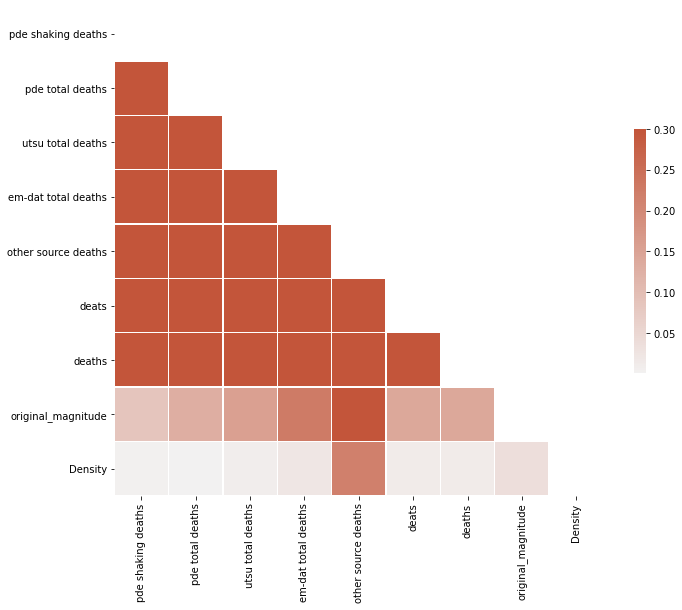

In [26]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [28]:
eq_table_pop['deaths'].describe()

count      1242.000000
mean       2526.877617
std       24295.697094
min           0.000000
25%           2.000000
50%          10.000000
75%          92.750000
max      655237.000000
Name: deaths, dtype: float64

In [30]:
corr_top_quartile = eq_table_pop[eq_table_pop['deaths'] > 92.75].corr()

In [32]:
mask = np.triu(np.ones_like(corr_top_quartile, dtype=bool))

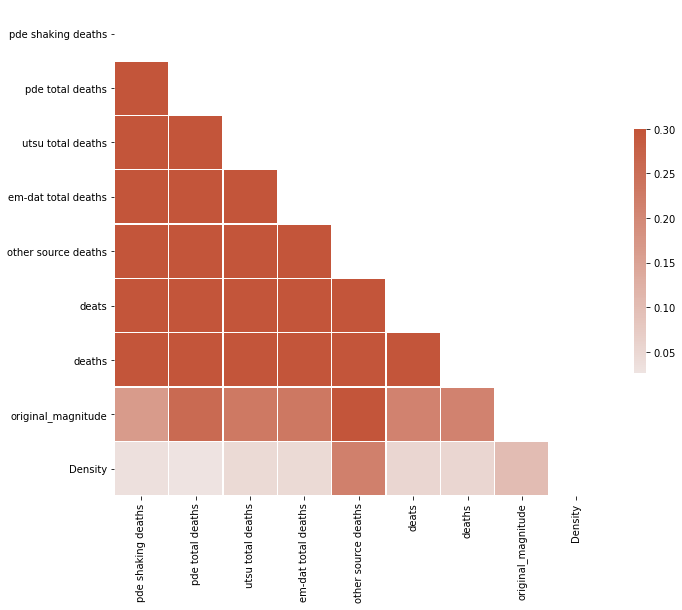

In [33]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_top_quartile, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});